In [1]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
# from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
# myfont = FontProperties(fname='/usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')

# import sys
# reload(sys)
# sys.setdefaultencoding('utf-8')

import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# plt.plot([-1,2,-5,3])
# plt.title(u'中文',fontproperties=myfont)
# plt.show()

# %matplotlib inline


In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

In [3]:
# load data
data_dir = '../dataset/DataFountain2019-消费者人群画像/'
train_df = pd.read_csv(data_dir + 'train_dataset.csv')
test_df = pd.read_csv(data_dir + 'test_dataset.csv')

## Observations

In [4]:
# print train_df.describe()
# print train_df.info()
print train_df.columns 
# substitue the column names
train_df.columns = ['uid','true_name_flag','age','uni_student_flag','blk_list_flag',\
                     '4g_unhealth_flag','net_age_till_now','top_up_month_diff','top_up_amount',\
                     'recent_6month_avg_use','total_account_fee','curr_month_balance',\
                     'curr_overdue_flag','cost_sensitivity','connect_num','freq_shopping_flag',\
                     'recent_3month_shopping_count','wanda_flag','sam_flag','movie_flag',\
                     'tour_flag','sport_flag','online_shopping_count','express_count',\
                     'finance_app_count','video_app_count','flight_count','train_count',\
                     'tour_app_count','score']
test_df.columns = train_df.columns[:-1]
print train_df.columns, len(train_df.columns)

Index([u'用户编码', u'用户实名制是否通过核实', u'用户年龄', u'是否大学生客户', u'是否黑名单客户', u'是否4G不健康客户',
       u'用户网龄（月）', u'用户最近一次缴费距今时长（月）', u'缴费用户最近一次缴费金额（元）', u'用户近6个月平均消费值（元）',
       u'用户账单当月总费用（元）', u'用户当月账户余额（元）', u'缴费用户当前是否欠费缴费', u'用户话费敏感度',
       u'当月通话交往圈人数', u'是否经常逛商场的人', u'近三个月月均商场出现次数', u'当月是否逛过福州仓山万达',
       u'当月是否到过福州山姆会员店', u'当月是否看电影', u'当月是否景点游览', u'当月是否体育场馆消费',
       u'当月网购类应用使用次数', u'当月物流快递类应用使用次数', u'当月金融理财类应用使用总次数', u'当月视频播放类应用使用次数',
       u'当月飞机类应用使用次数', u'当月火车类应用使用次数', u'当月旅游资讯类应用使用次数', u'信用分'],
      dtype='object')
Index([u'uid', u'true_name_flag', u'age', u'uni_student_flag',
       u'blk_list_flag', u'4g_unhealth_flag', u'net_age_till_now',
       u'top_up_month_diff', u'top_up_amount', u'recent_6month_avg_use',
       u'total_account_fee', u'curr_month_balance', u'curr_overdue_flag',
       u'cost_sensitivity', u'connect_num', u'freq_shopping_flag',
       u'recent_3month_shopping_count', u'wanda_flag', u'sam_flag',
       u'movie_flag', u'tour_flag', u'sport_flag', u'online_sh

## EDA

In [5]:
# Categorical features
categorical_cols = ['4g_unhealth_flag', 'blk_list_flag', 'cost_sensitivity', 'curr_overdue_flag', 'freq_shopping_flag',
                   'movie_flag', 'tour_flag', 'sport_flag', 'sam_flag', 'true_name_flag', 
                    'wanda_flag', 'uni_student_flag']
numerical_cols = ['age', 'net_age_till_now', 'top_up_amount', 'recent_6month_avg_use',
                 'total_account_fee', 'curr_month_balance', 'connect_num', 'recent_3month_shopping_count',
                 'online_shopping_count', 'express_count', 'finance_app_count', 'video_app_count', 'flight_count',
                 'train_count', 'tour_app_count', 'top_up_month_diff']
print len(categorical_cols), len(numerical_cols)

12 16


In [6]:
train_df['score_qcut'] = pd.qcut(train_df['score'], q=4, labels=False)

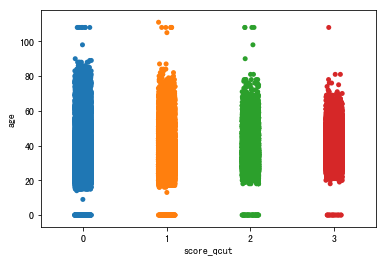

In [7]:
sns.stripplot('score_qcut', 'age', data=train_df)

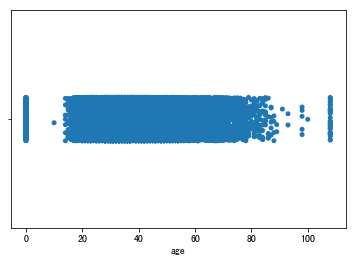

In [9]:
sns.stripplot('age', data=test_df)

In [26]:
train_df['blk_list_flag'].value_counts()

0    47560
1     2440
Name: blk_list_flag, dtype: int64

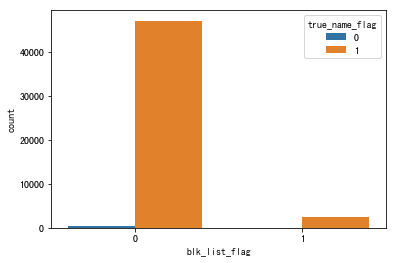

In [28]:
sns.countplot('blk_list_flag', hue='true_name_flag', data=train_df)

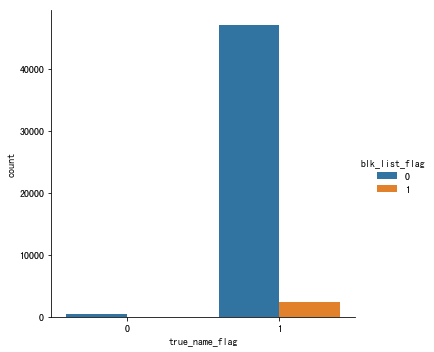

In [15]:
sns.factorplot('true_name_flag', hue='blk_list_flag', data=train_df, kind='count')

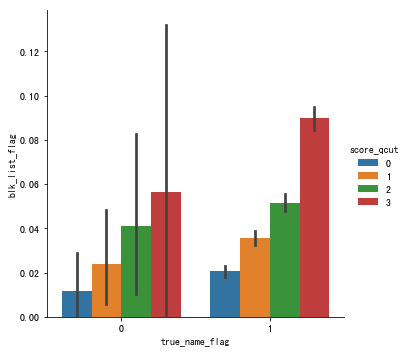

In [14]:
sns.factorplot('true_name_flag', 'blk_list_flag', hue='score_qcut', data=train_df, kind='bar')

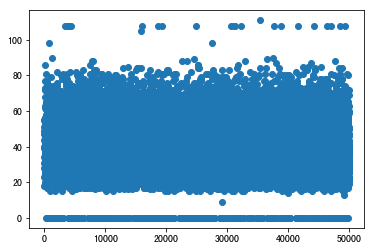

In [69]:
plt.scatter(range(train_df['age'].shape[0]), train_df['age'])

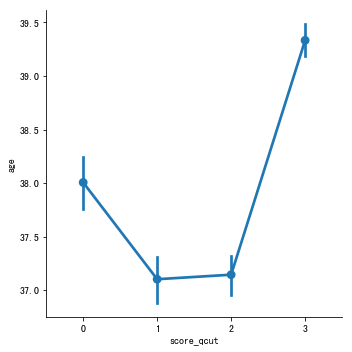

In [70]:
sns.factorplot('score_qcut', 'age', data=train_df, kind='point')

In [60]:
# train_df['age'][train_df['age']<16] = train_df['age'].mean()
# train_df['age'][train_df['age']>100] = train_df['age'].mean()

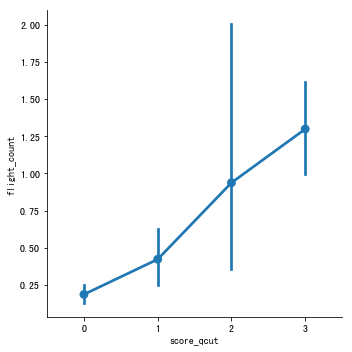

In [79]:
sns.factorplot('score_qcut', 'flight_count', data=train_df, kind='point')

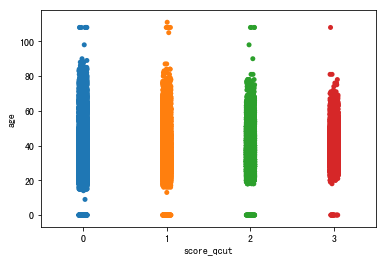

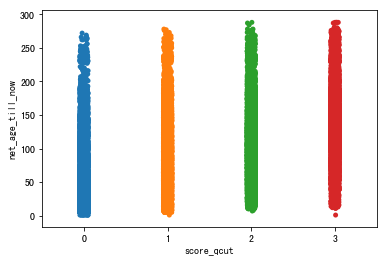

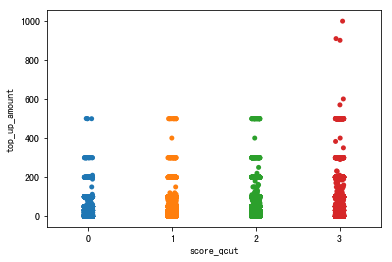

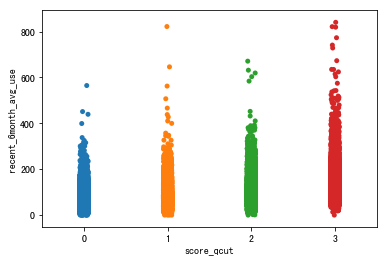

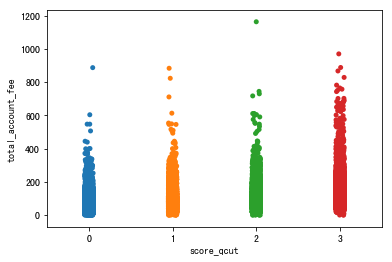

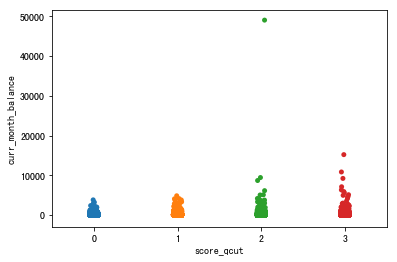

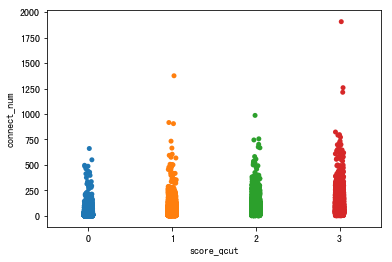

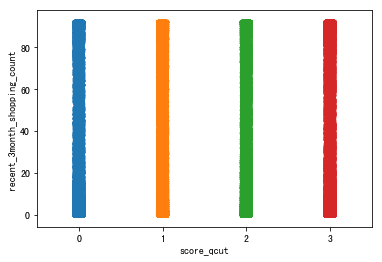

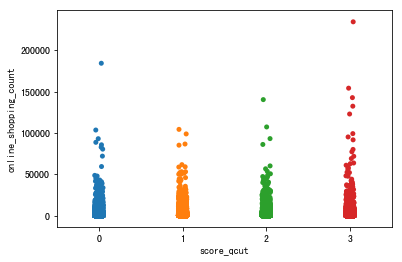

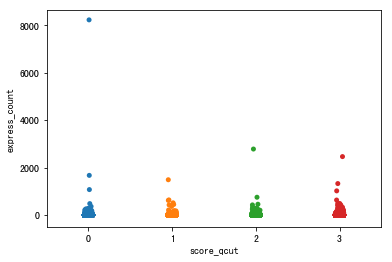

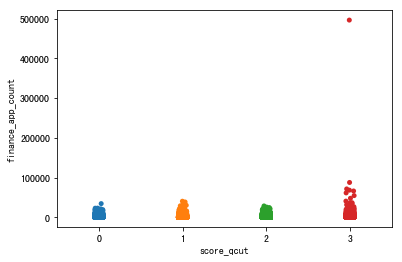

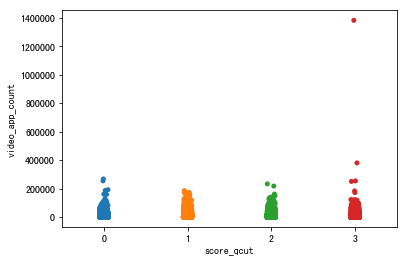

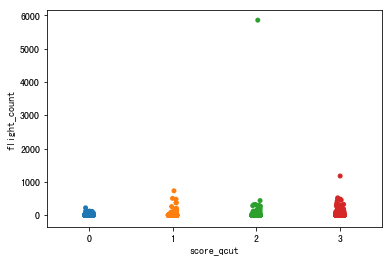

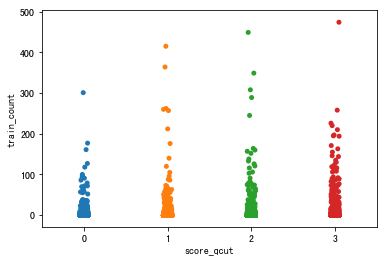

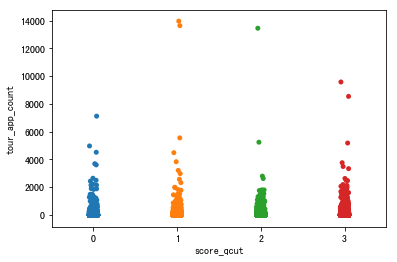

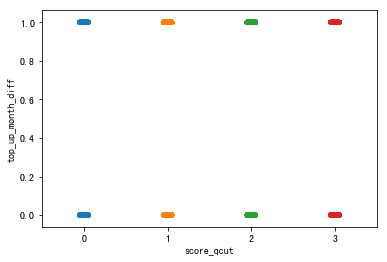

In [105]:
for col in numerical_cols:
    sns.stripplot('score_qcut', col, data=train_df, jitter=0.05)
    plt.show()

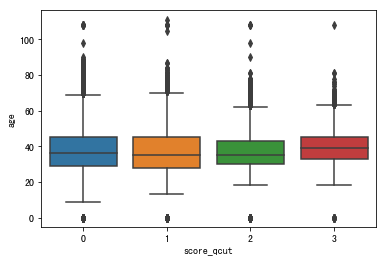

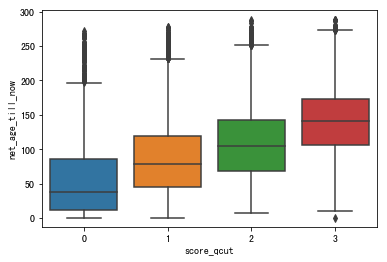

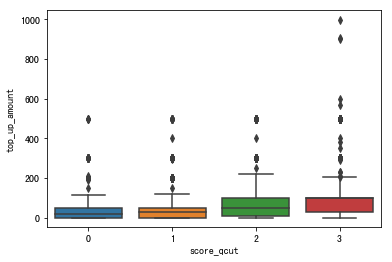

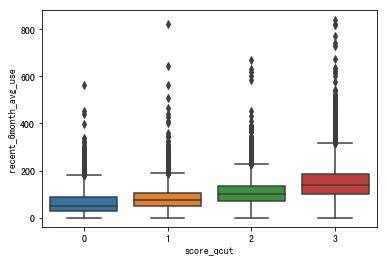

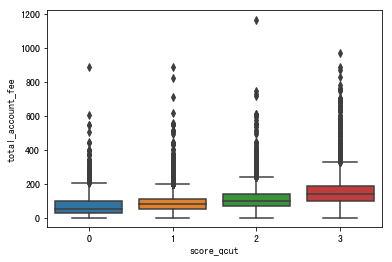

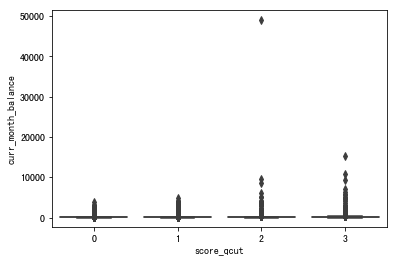

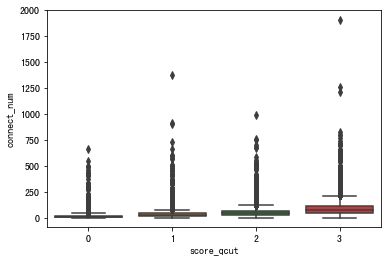

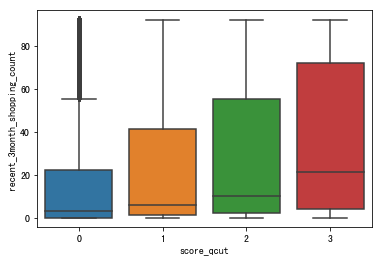

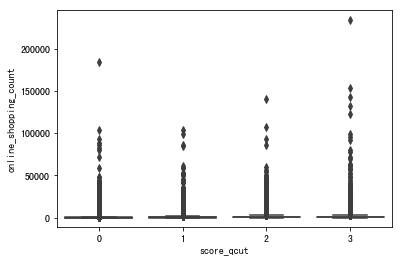

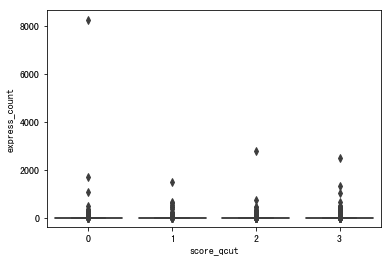

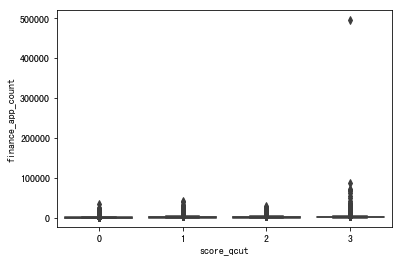

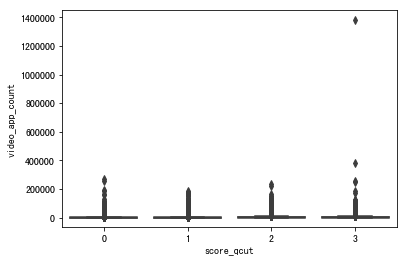

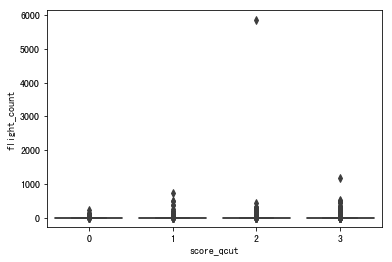

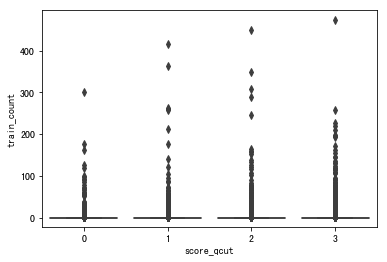

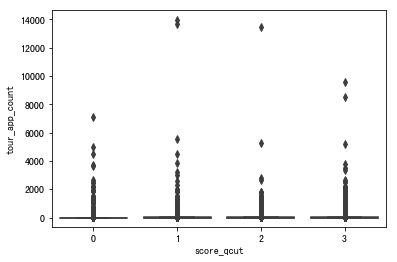

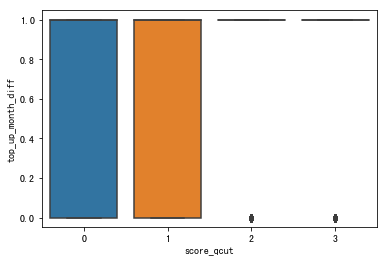

In [108]:
for col in numerical_cols:
    sns.boxplot('score_qcut', col, data=train_df)
    plt.show()

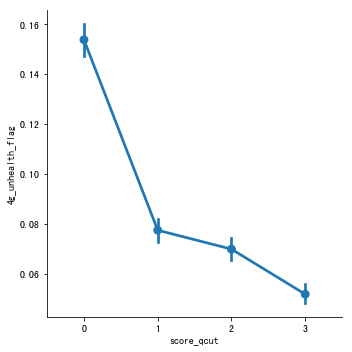

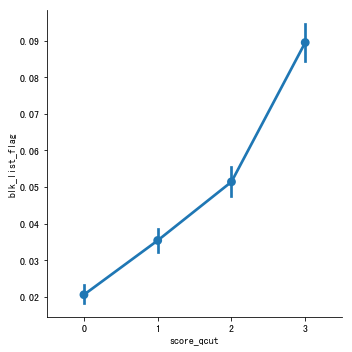

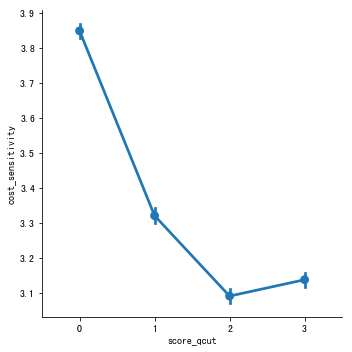

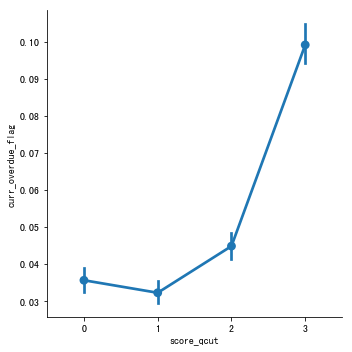

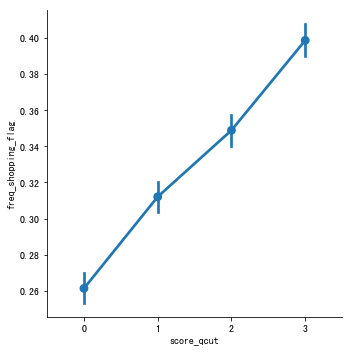

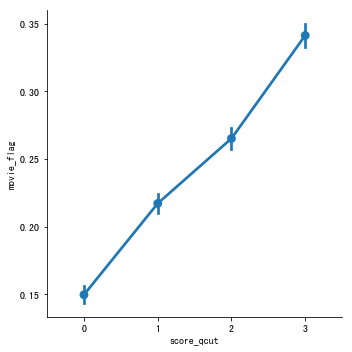

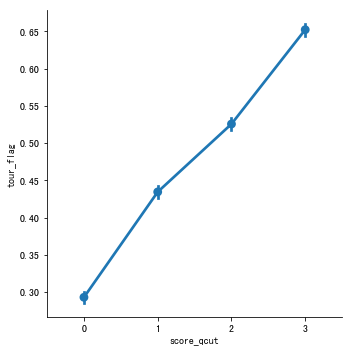

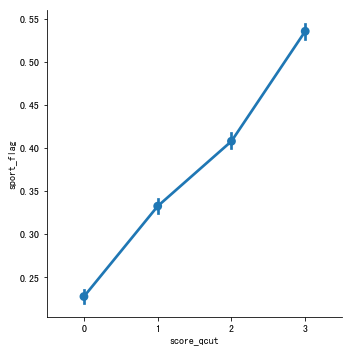

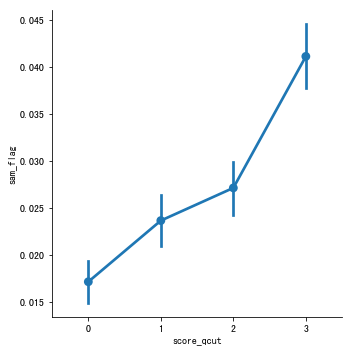

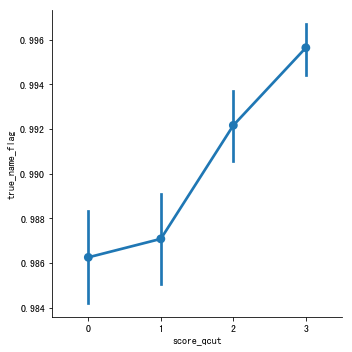

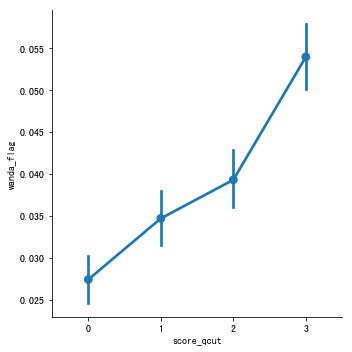

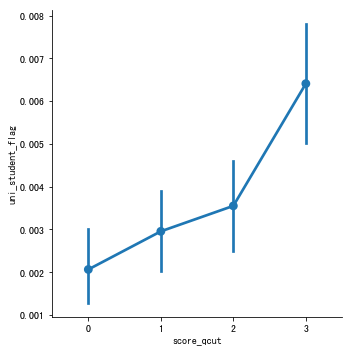

In [84]:
for col in categorical_cols:
    sns.factorplot('score_qcut', col, data=train_df, kind='point')

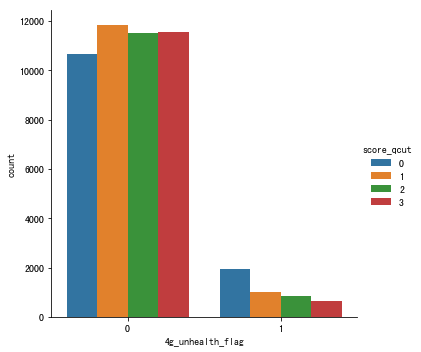

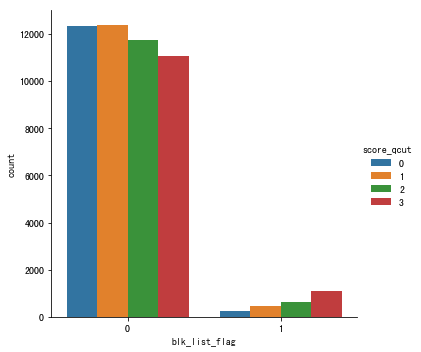

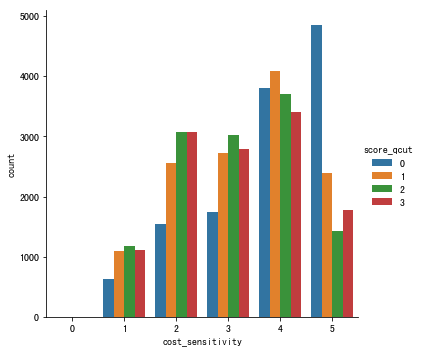

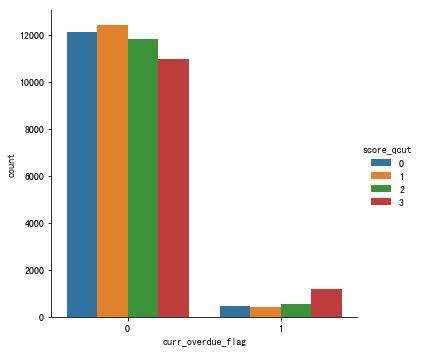

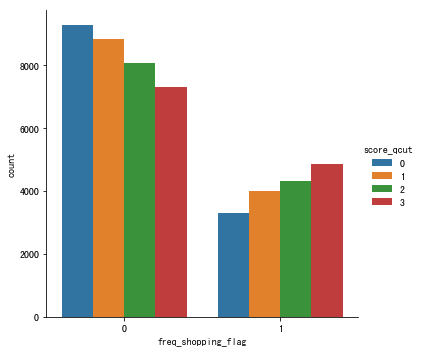

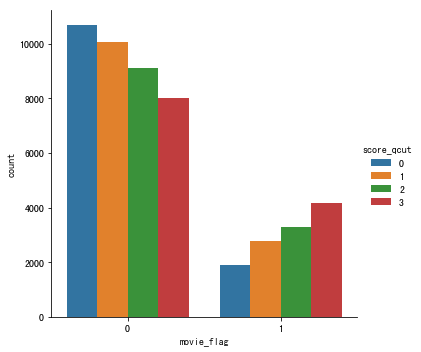

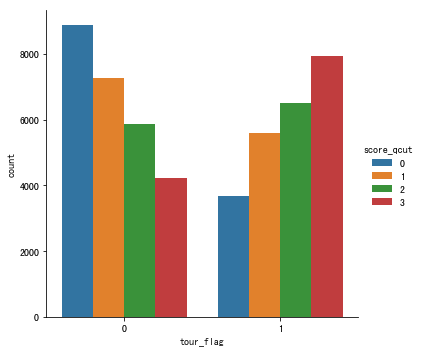

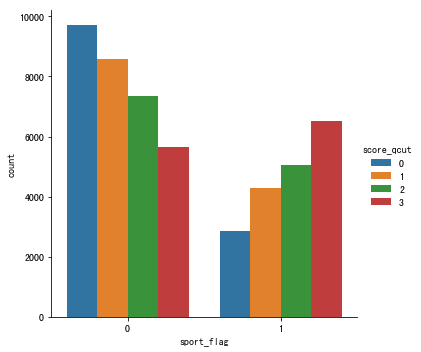

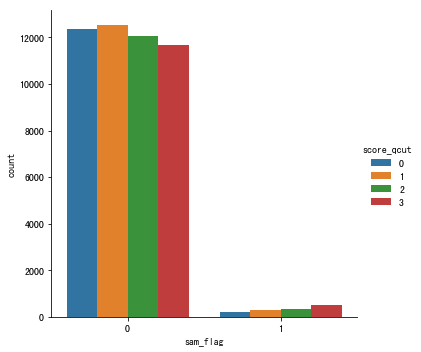

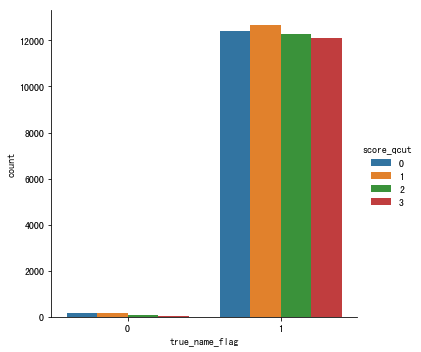

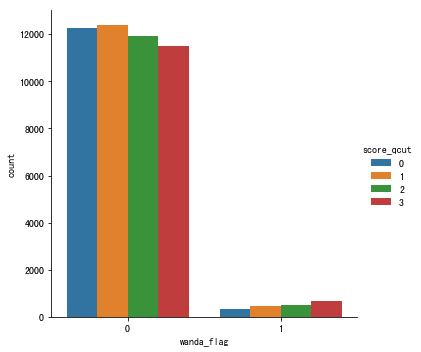

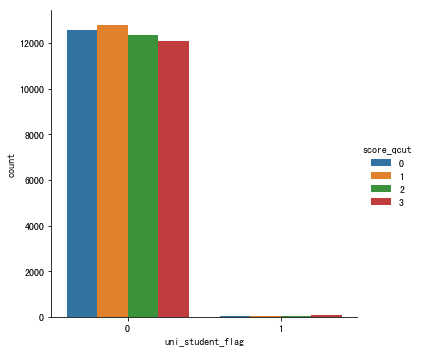

In [89]:
for col in categorical_cols:
    sns.factorplot(col, hue='score_qcut', data=train_df, kind='count')

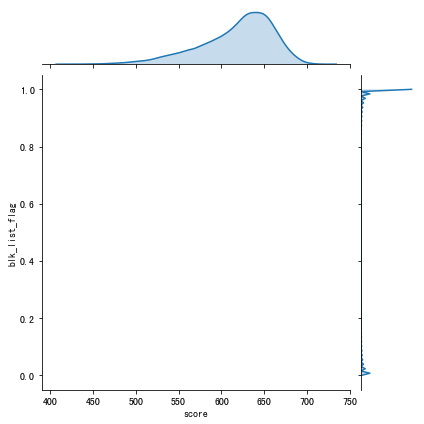

In [106]:
sns.jointplot('score', 'blk_list_flag', hue='4g_unhealth_flag', data=train_df, kind='kde')

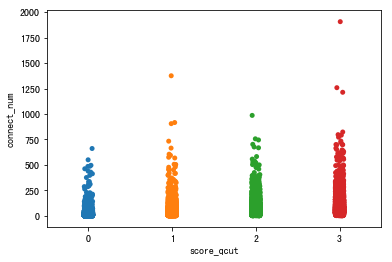

In [101]:
# first see the distribution of target
# sns.kdeplot(train_df['score_qcut'], train_df['connect_num'], shade=True, cbar=True)
sns.stripplot(x="score_qcut", y="connect_num", data=train_df, jitter=0.05)

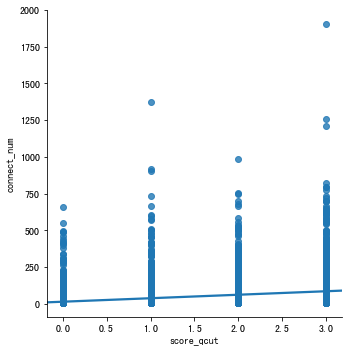

In [50]:
sns.lmplot('score_qcut', 'connect_num', data=train_df)

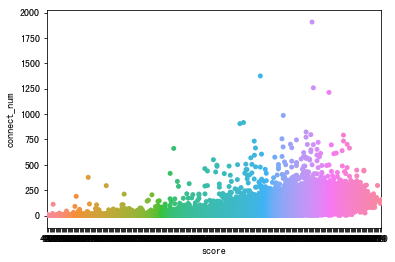

In [36]:
sns.stripplot(x='score', y='connect_num', data=train_df, jitter=True, edgecolor="gray")

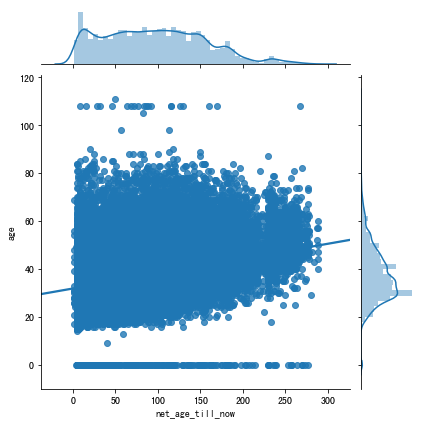

In [40]:
sns.jointplot(x='net_age_till_now', y='age', data=train_df, kind='reg')

<Figure size 432x288 with 0 Axes>

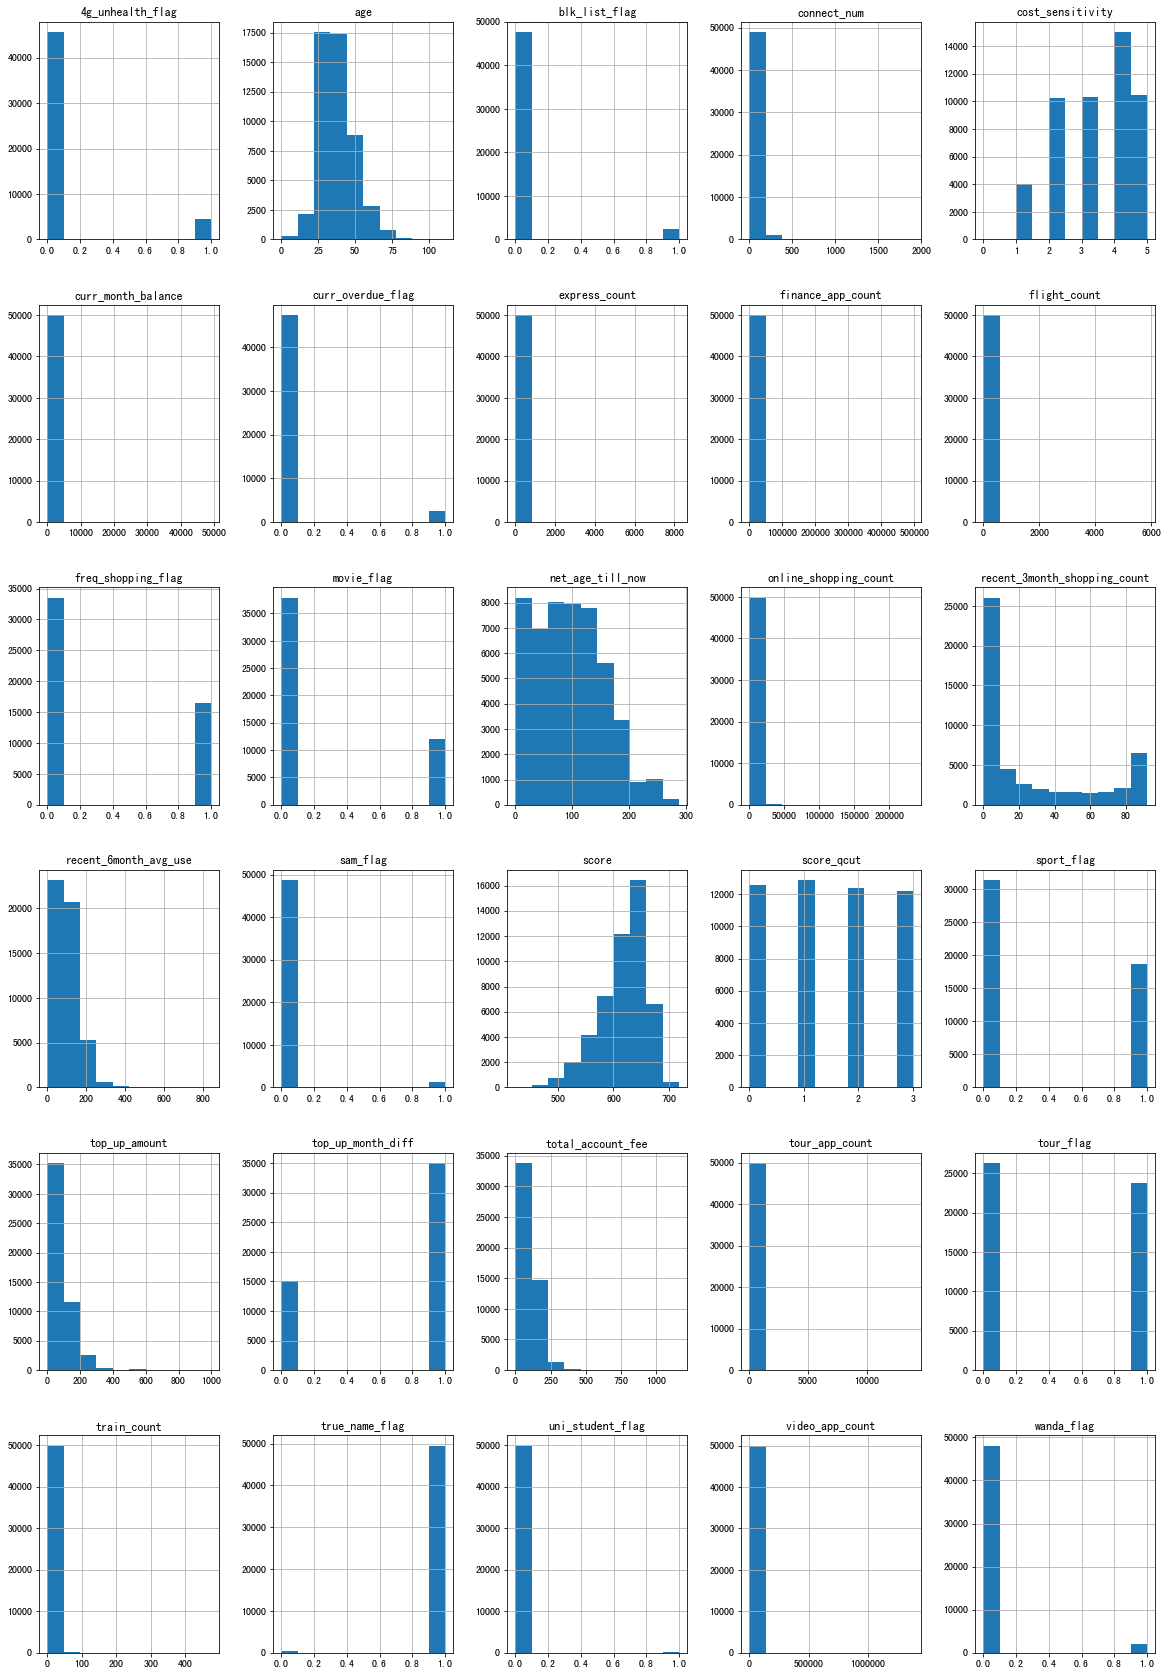

<Figure size 432x288 with 0 Axes>

In [51]:
train_df.hist(figsize=(20, 30))
plt.figure()

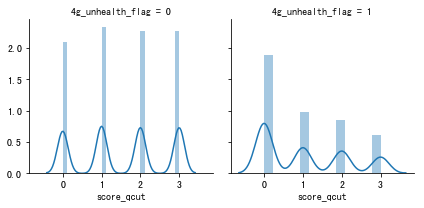

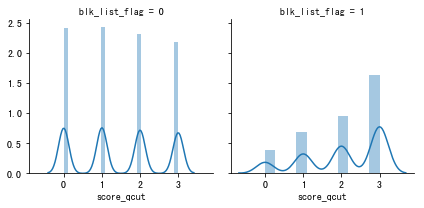

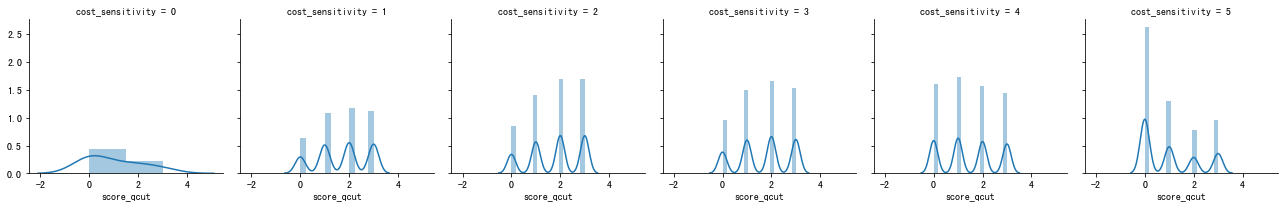

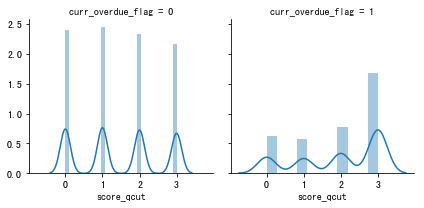

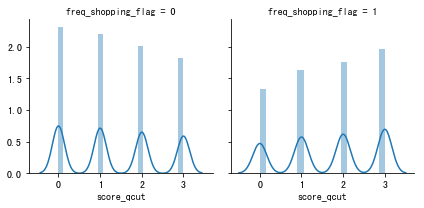

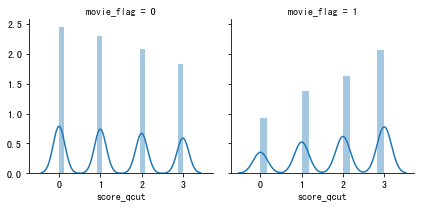

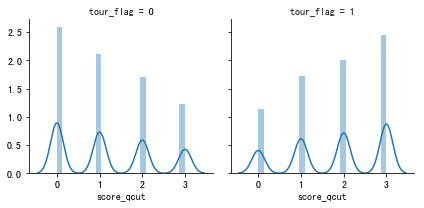

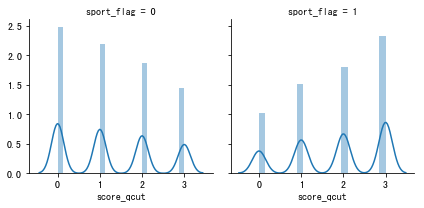

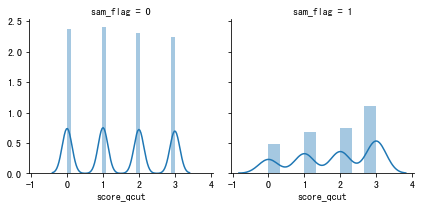

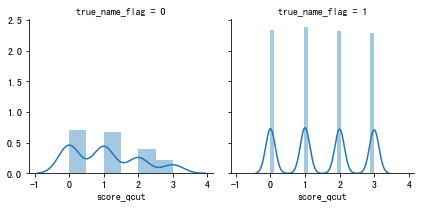

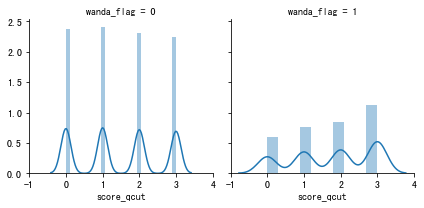

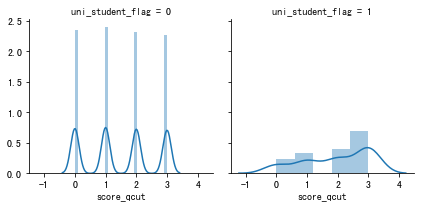

In [52]:
for col_cat in categorical_cols:
    g = sns.FacetGrid(train_df, col=col_cat)
    g.map(sns.distplot, 'score_qcut')

In [ ]:
sns.pairplot(train_df, hue='score_qcut')

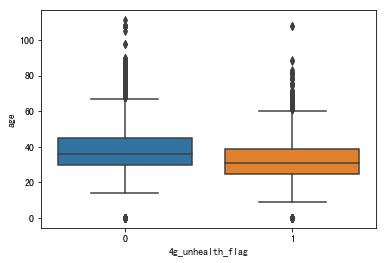

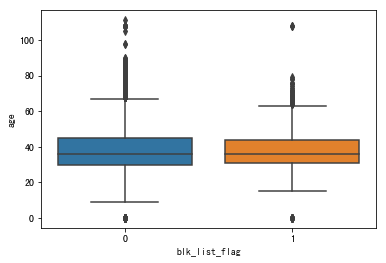

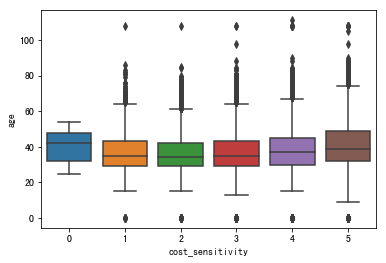

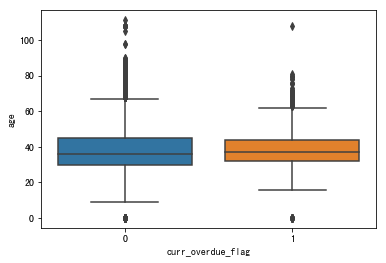

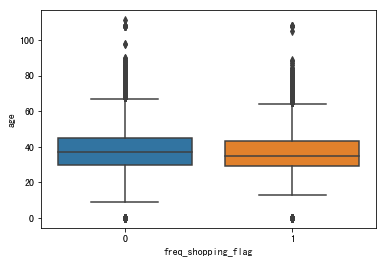

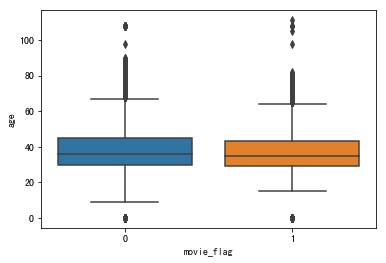

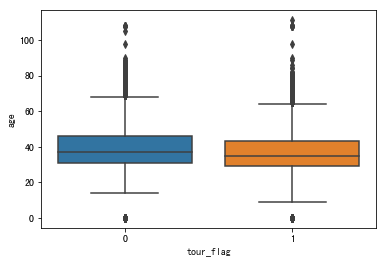

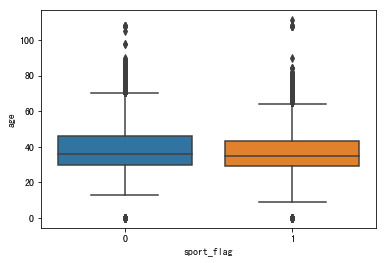

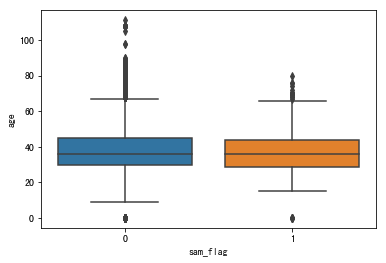

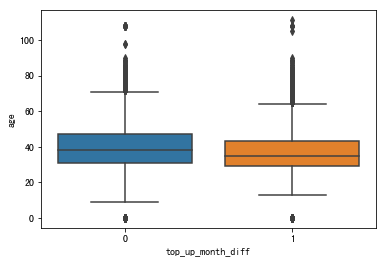

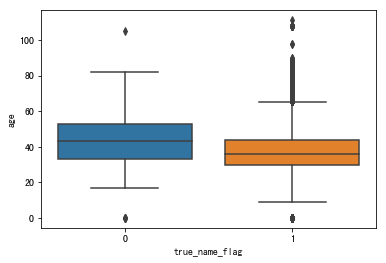

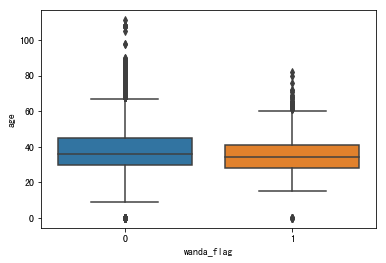

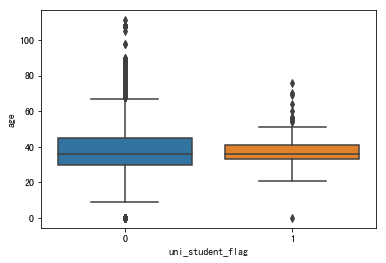

In [12]:
col2 = 'age'
for col1 in categorical_cols:
    sns.boxplot(train_df[col1], train_df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

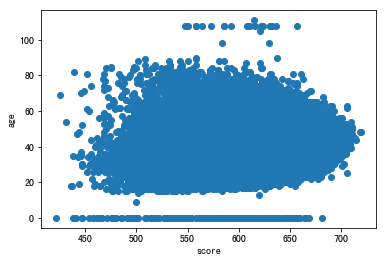

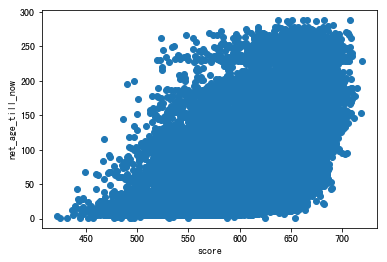

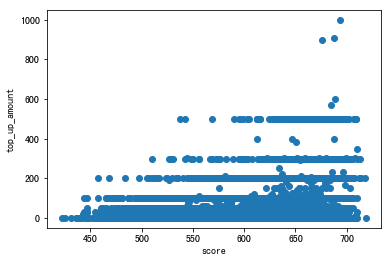

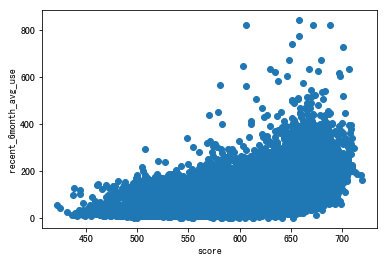

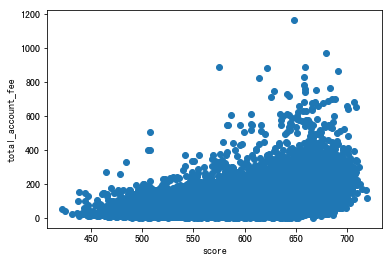

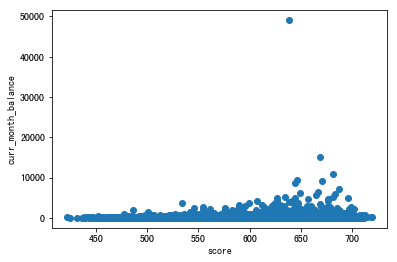

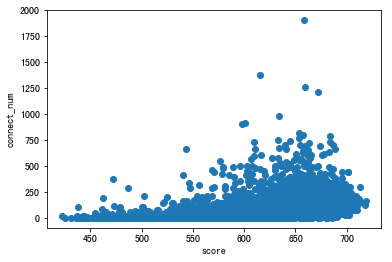

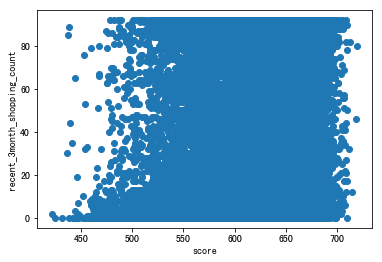

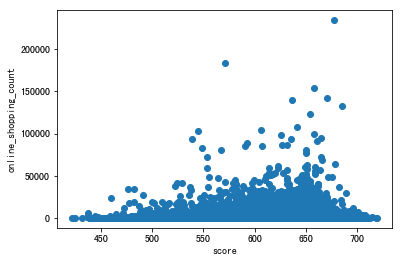

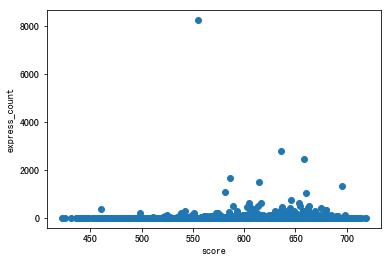

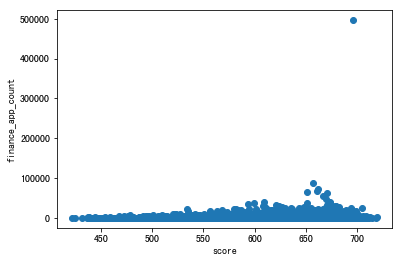

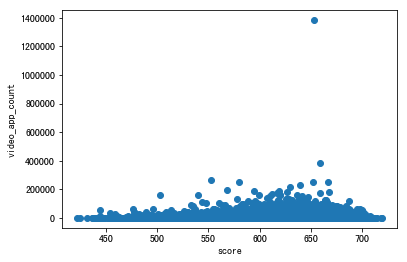

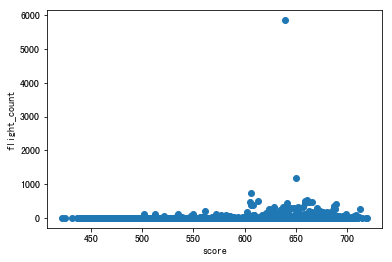

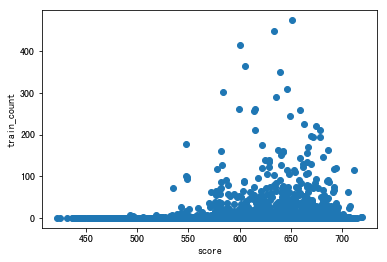

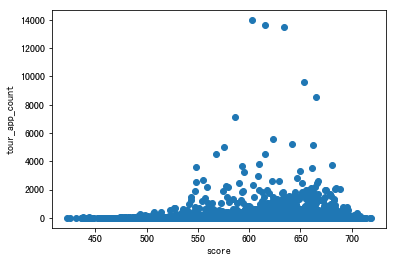

In [9]:
# sns.factorplot(data=train_df, x="model_year", y="mpg")
# 1. '当月通话交往圈人数'--(connect_num)
# 2. '用户网龄（月）'--(net_age_till_now)
# 3. '用户近6个月平均消费值（元）'--(recent_6month_avg_use)
# 4. '年龄'--(age)
# 5. '用户账单当月总费用（元）'--(total_account_fee)

col1, col2 = 'score', 'connect_num'
# col1, col2 = 'score', 'age'
# col1, col2 = 'score', 'net_age_till_now'
# col1, col2 = 'score', 'recent_6month_avg_use'
# col1, col2 = 'score', 'total_account_fee'

# plt.scatter(train_df['score'], train_df['connect_num'])
for col2 in numerical_cols:
    plt.scatter(train_df[col1], train_df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
# plt.scatter(train_df['score'], train_df['age'])
# plt.scatter(train_df['score'], train_df['net_age_till_now'])
# plt.scatter(train_df['score'], train_df['recent_6month_avg_use'])
# plt.scatter(train_df['score'], train_df['total_account_fee'])

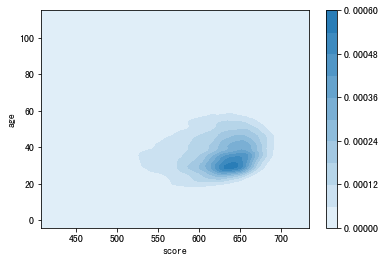

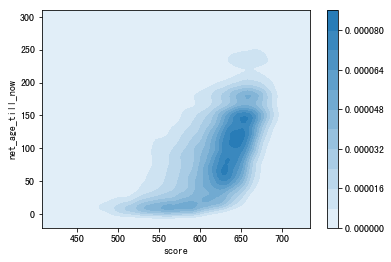

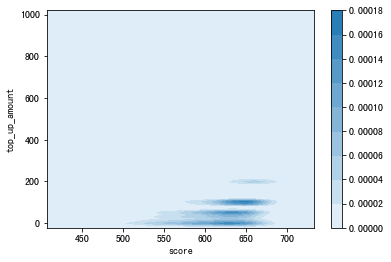

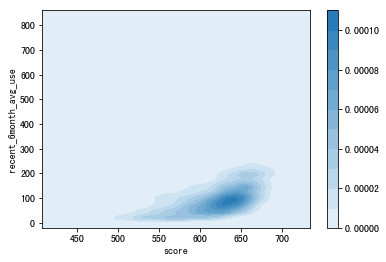

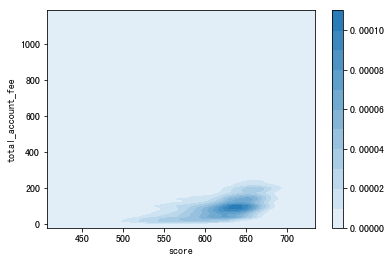

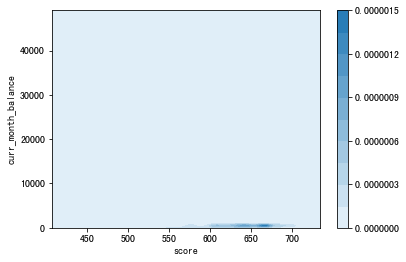

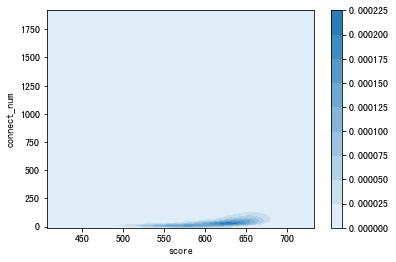

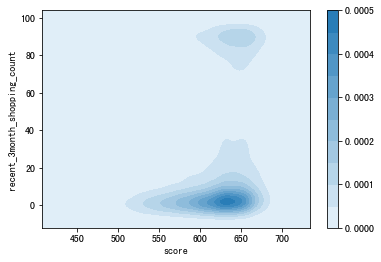

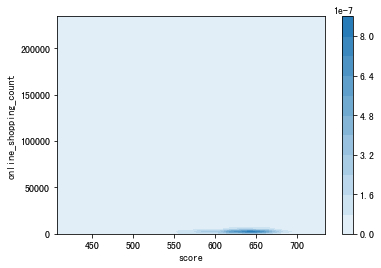

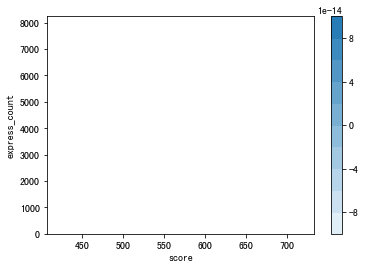

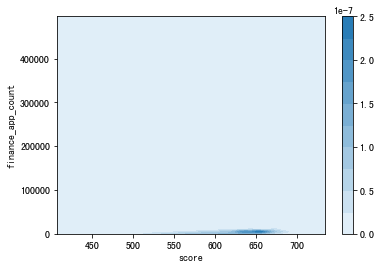

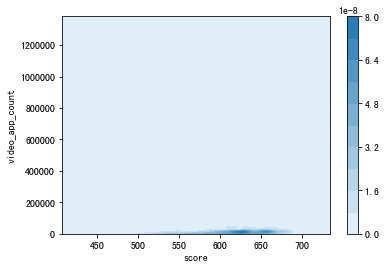

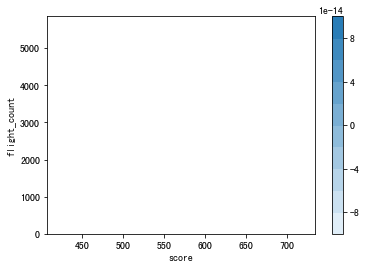

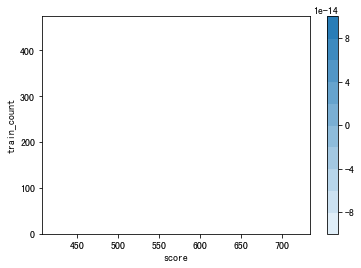

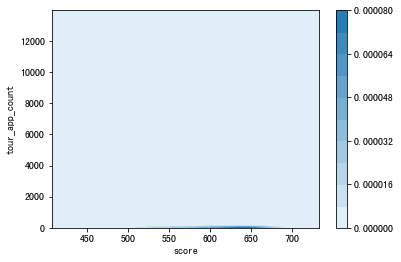

In [10]:
for col2 in numerical_cols:
    sns.kdeplot(train_df[col1], train_df[col2], shade=True, cbar=True)
    plt.show()

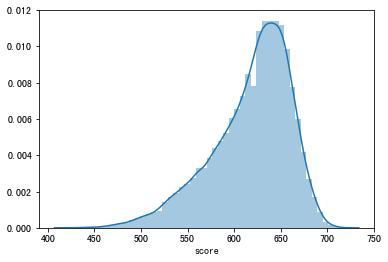

In [34]:
sns.distplot(train_df[col1])

### Continuous Variances

Text(0,0.5,'connect_num')

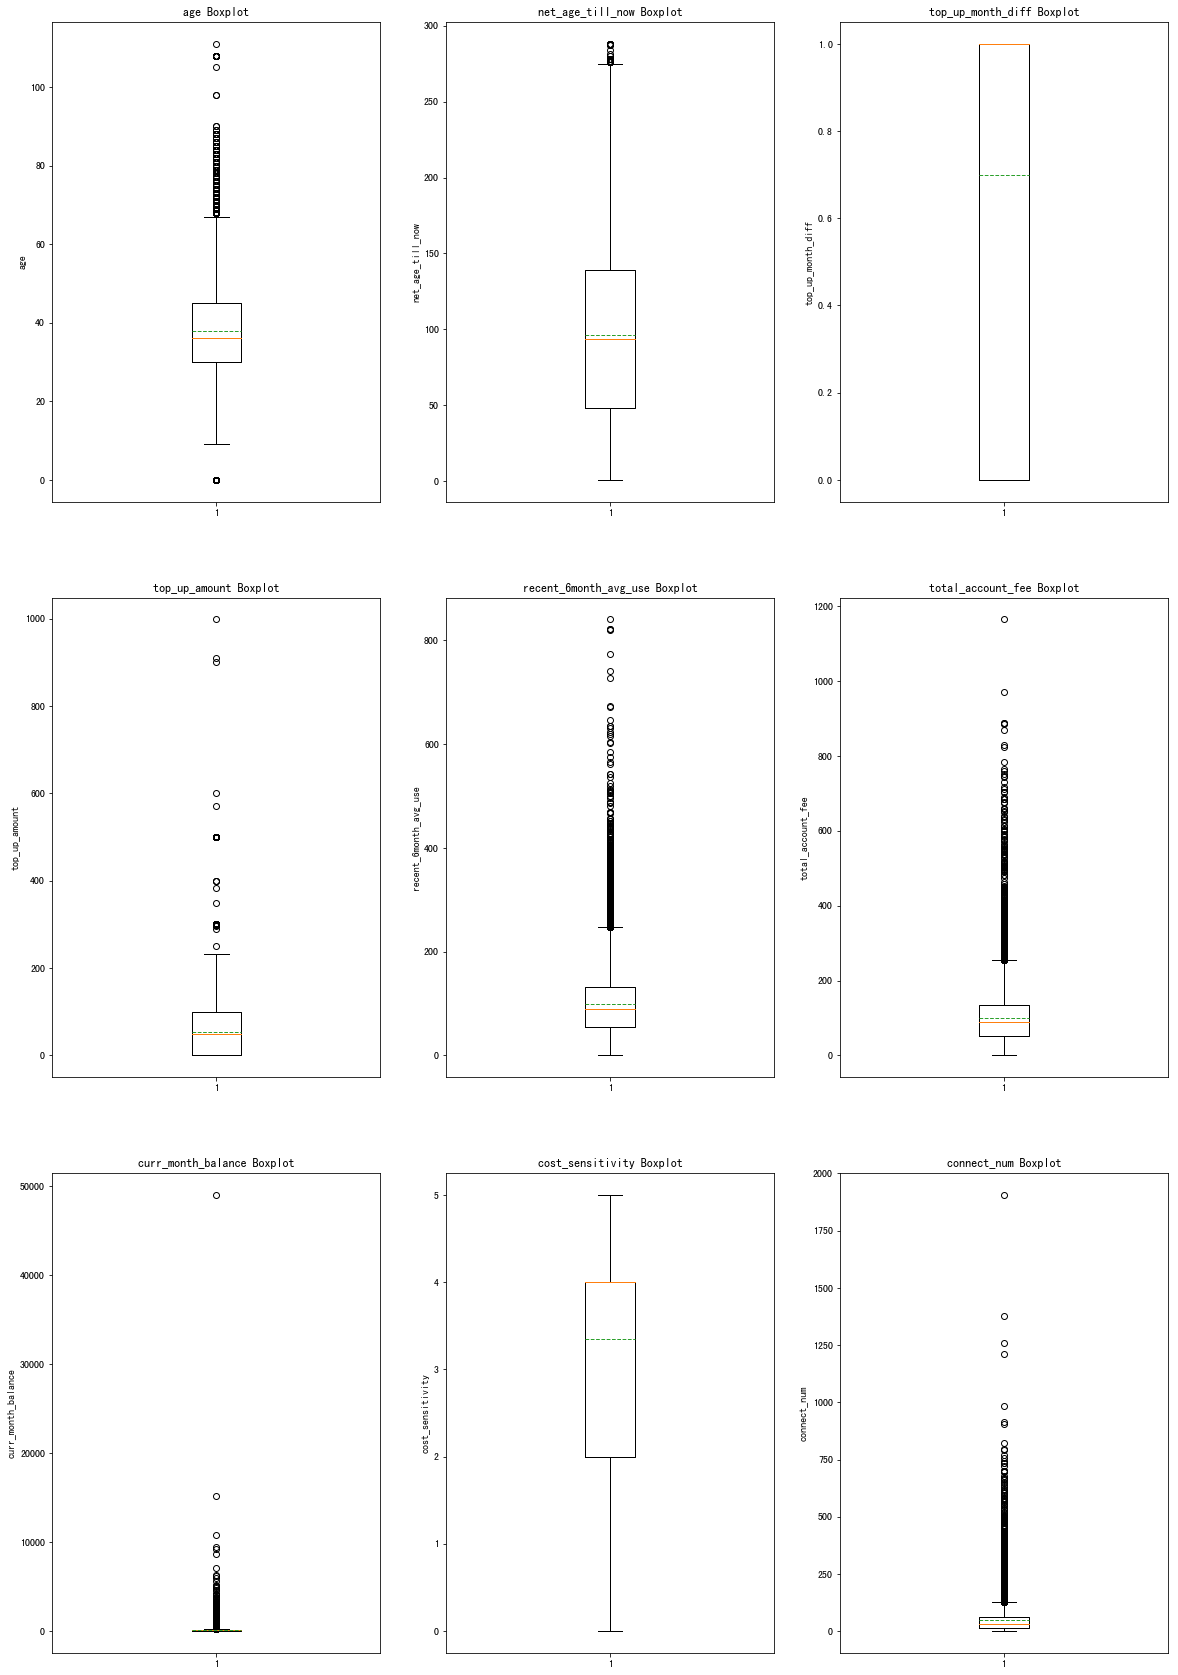

In [38]:
plt.figure(figsize=(20, 30))

plt.subplot(331)
plt.boxplot(x=train_df['age'], showmeans=True, meanline=True)
plt.title('age Boxplot')
plt.ylabel('age')

plt.subplot(332)
plt.boxplot(x=train_df['net_age_till_now'], showmeans=True, meanline=True)
plt.title('net_age_till_now Boxplot')
plt.ylabel('net_age_till_now')

plt.subplot(333)
plt.boxplot(x=train_df['top_up_month_diff'], showmeans=True, meanline=True)
plt.title('top_up_month_diff Boxplot')
plt.ylabel('top_up_month_diff')

plt.subplot(334)
plt.boxplot(x=train_df['top_up_amount'], showmeans=True, meanline=True)
plt.title('top_up_amount Boxplot')
plt.ylabel('top_up_amount')

plt.subplot(335)
plt.boxplot(x=train_df['recent_6month_avg_use'], showmeans=True, meanline=True)
plt.title('recent_6month_avg_use Boxplot')
plt.ylabel('recent_6month_avg_use')

plt.subplot(336)
plt.boxplot(x=train_df['total_account_fee'], showmeans=True, meanline=True)
plt.title('total_account_fee Boxplot')
plt.ylabel('total_account_fee')

plt.subplot(337)
plt.boxplot(x=train_df['curr_month_balance'], showmeans=True, meanline=True)
plt.title('curr_month_balance Boxplot')
plt.ylabel('curr_month_balance')

plt.subplot(338)
plt.boxplot(x=train_df['cost_sensitivity'], showmeans=True, meanline=True)
plt.title('cost_sensitivity Boxplot')
plt.ylabel('cost_sensitivity')

plt.subplot(339)
plt.boxplot(x=train_df['connect_num'], showmeans=True, meanline=True)
plt.title('connect_num Boxplot')
plt.ylabel('connect_num')


Text(0,0.5,'score')

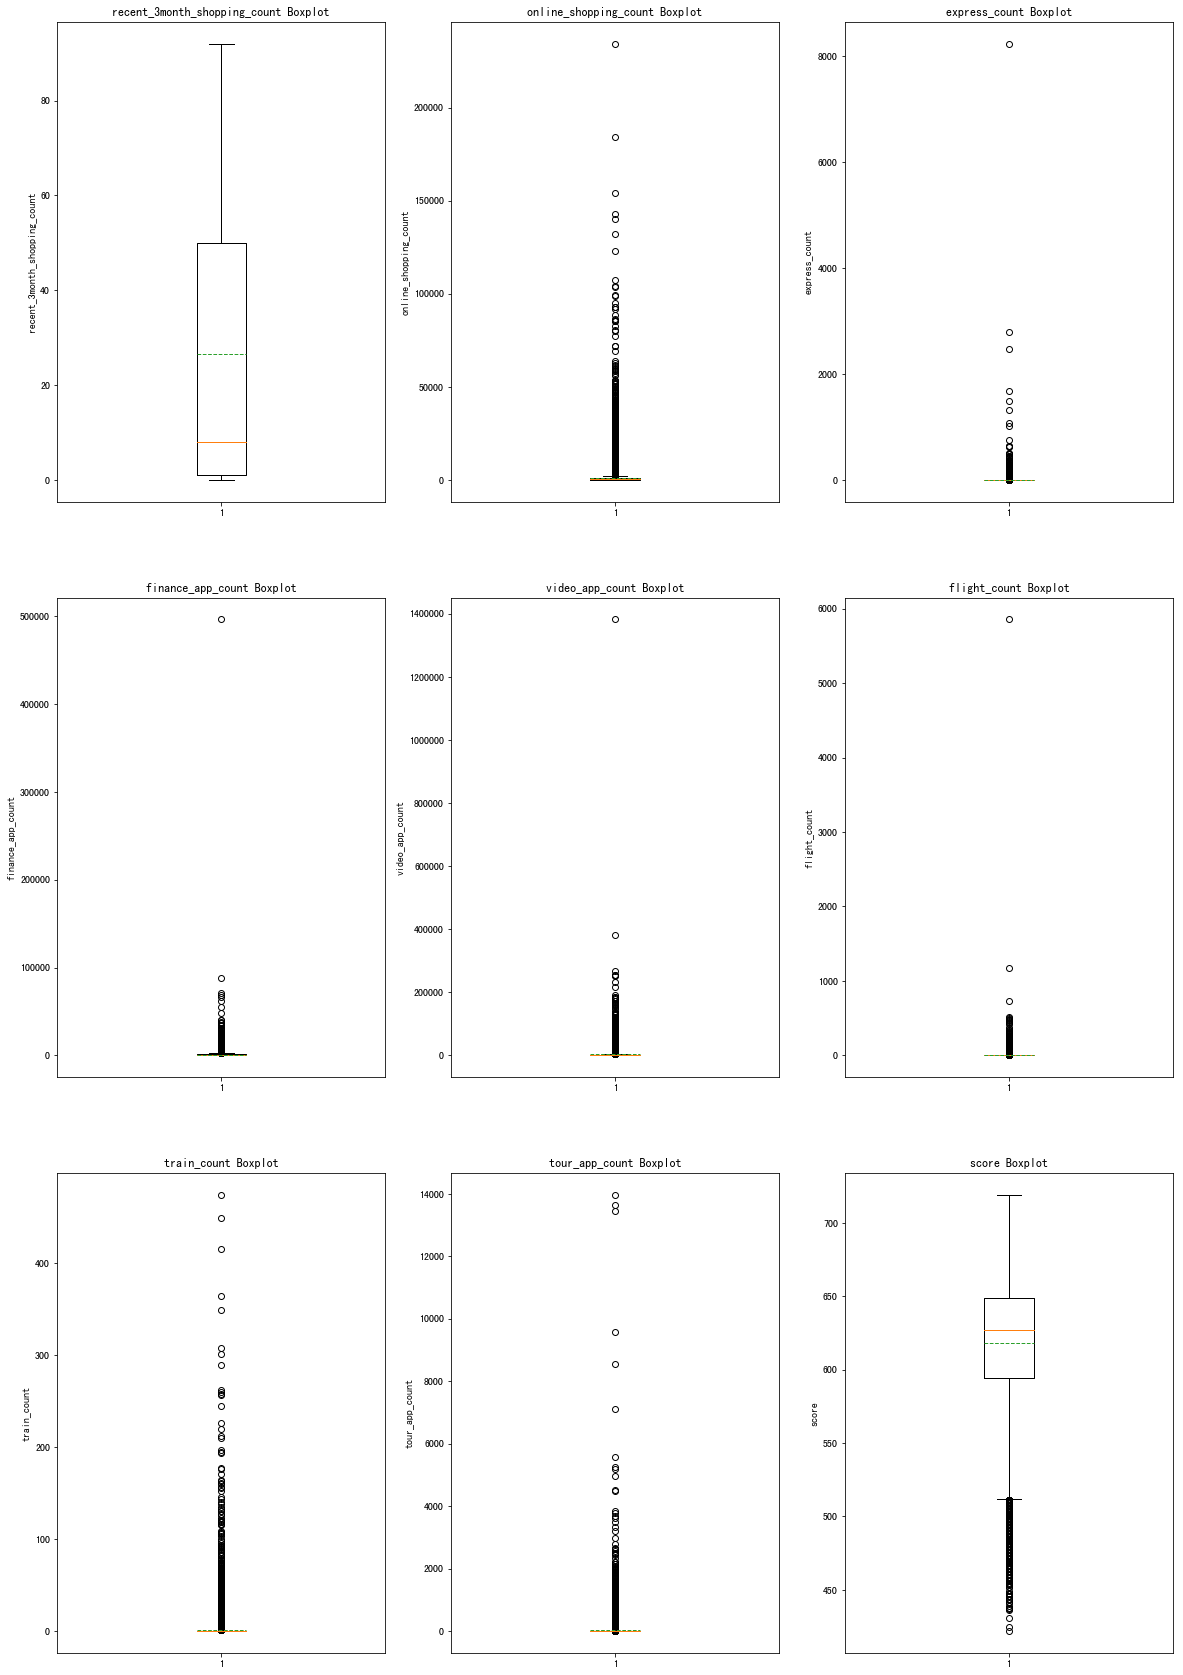

In [39]:
plt.figure(figsize=(20, 30))

plt.subplot(331)
plt.boxplot(x=train_df['recent_3month_shopping_count'], showmeans=True, meanline=True)
plt.title('recent_3month_shopping_count Boxplot')
plt.ylabel('recent_3month_shopping_count')

plt.subplot(332)
plt.boxplot(x=train_df['online_shopping_count'], showmeans=True, meanline=True)
plt.title('online_shopping_count Boxplot')
plt.ylabel('online_shopping_count')

plt.subplot(333)
plt.boxplot(x=train_df['express_count'], showmeans=True, meanline=True)
plt.title('express_count Boxplot')
plt.ylabel('express_count')

plt.subplot(334)
plt.boxplot(x=train_df['finance_app_count'], showmeans=True, meanline=True)
plt.title('finance_app_count Boxplot')
plt.ylabel('finance_app_count')

plt.subplot(335)
plt.boxplot(x=train_df['video_app_count'], showmeans=True, meanline=True)
plt.title('video_app_count Boxplot')
plt.ylabel('video_app_count')

plt.subplot(336)
plt.boxplot(x=train_df['flight_count'], showmeans=True, meanline=True)
plt.title('flight_count Boxplot')
plt.ylabel('flight_count')

plt.subplot(337)
plt.boxplot(x=train_df['train_count'], showmeans=True, meanline=True)
plt.title('train_count Boxplot')
plt.ylabel('train_count')

plt.subplot(338)
plt.boxplot(x=train_df['tour_app_count'], showmeans=True, meanline=True)
plt.title('tour_app_count Boxplot')
plt.ylabel('tour_app_count')

plt.subplot(339)
plt.boxplot(x=train_df['score'], showmeans=True, meanline=True)
plt.title('score Boxplot')
plt.ylabel('score')

### Categorical Variances


## Feature Engineering
### add features
1. 离线充值数字有整数和小数，可能是充值方式不同，作为一个新特征

In [40]:
def produce_offline_feat(data_df):
    data_df['top_up_amount_offline'] = 0
    data_df['top_up_amount_offline'][(data_df['top_up_amount'] % 10 == 0) & (data_df['top_up_amount'] != 0)] = 1
    return data_df

In [ ]:
# add new features
train_df = produce_offline_feat(train_df)
test_df = produce_offline_feat(test_df)

## Training

In [41]:
# LightGBM params
params = {
    'learning_rate': 0.01,
    'boosting_type': 'gbdt',
    'objective': 'regression_l1',
    'metric': 'mae',
    'feature_fraction': 0.6,
    'bagging_fraction': 0.8,
    'bagging_freq': 2,
    'num_leaves': 31,
    'verbose': -1,
    'max_depth': 5,
    'lambda_l2': 5, 'lambda_l1': 0
}

In [42]:
# drop useless features
print train_df.columns
X = train_df.drop(['uid','score'], axis=1)
X_submit = test_df.drop(['uid'], axis=1)

Index([u'uid', u'true_name_flag', u'age', u'uni_student_flag',
       u'blk_list_flag', u'4g_unhealth_flag', u'net_age_till_now',
       u'top_up_month_diff', u'top_up_amount', u'recent_6month_avg_use',
       u'total_account_fee', u'curr_month_balance', u'curr_overdue_flag',
       u'cost_sensitivity', u'connect_num', u'freq_shopping_flag',
       u'recent_3month_shopping_count', u'wanda_flag', u'sam_flag',
       u'movie_flag', u'tour_flag', u'sport_flag', u'online_shopping_count',
       u'express_count', u'finance_app_count', u'video_app_count',
       u'flight_count', u'train_count', u'tour_app_count', u'score'],
      dtype='object')


In [43]:
# k-cv
N_FOLDS = 5
y = train_df['score']
kfold = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=2019)
kf = kfold.split(X, y)

In [44]:
# process the k-cv
cv_pred = np.zeros(test_df.shape[0])
valid_best_l2_all = 0

feature_importance_df = pd.DataFrame()
count = 0
for i, (train_idx, test_idx) in enumerate(kf):
    print('fold: ',i, ' training')
    X_train, X_test, y_train, y_test = X.iloc[train_idx, :], X.iloc[test_idx, :], y.iloc[train_idx], y.iloc[test_idx]
    data_train = lgb.Dataset(X_train, y_train)
    data_test = lgb.Dataset(X_test, y_test)
    lgb_model = lgb.train(params, data_train, num_boost_round=10000, valid_sets=data_test, 
                          verbose_eval=-1, early_stopping_rounds=50)
    cv_pred = lgb_model.predict(X_submit, num_iteration=lgb_model.best_iteration)
    valid_best_l2_all += lgb_model.best_score['valid_0']['l1']
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = list(X_train.columns)
    fold_importance_df["importance"] = lgb_model.feature_importance(importance_type='gain', iteration=lgb_model.best_iteration)
    fold_importance_df["fold"] = count + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    count += 1
    
cv_pred /= N_FOLDS
valid_best_l2_all /= N_FOLDS
print('cv score for valid is: ', 1/(1+valid_best_l2_all))

('fold: ', 0, ' training')
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[2376]	valid_0's l1: 14.8148
('fold: ', 1, ' training')
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1924]	valid_0's l1: 14.7219
('fold: ', 2, ' training')
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[2769]	valid_0's l1: 14.7781
('fold: ', 3, ' training')
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[3004]	valid_0's l1: 14.4858
('fold: ', 4, ' training')
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[2268]	valid_0's l1: 14.8483
('cv score for valid is: ', 0.06357366885490774)


In [45]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()

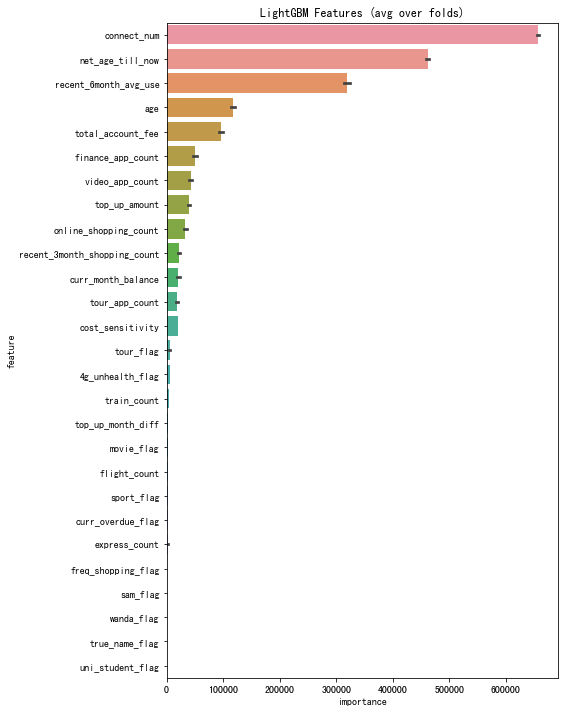

In [46]:
display_importances(feature_importance_df)

## Submit

In [48]:
submit_df = test_df[['uid']]
submit_df['score'] = cv_pred
submit_df.columns = ['id', 'score']

# int
submit_df['score'] = submit_df['score'].apply(lambda x: int(np.round(x)))
submit_df.to_csv('./submission/baseline_0.06357.csv', index=False)

In [ ]:
baseline
cv score for valid is:  0.06357366885490774
    
#充值金额是否为整数
cv score for valid is:  0.06343660584697094
#当月话费/半年话费
cv score for valid is:  0.06349188259250227
#当月话费/余额
cv score for valid is:  0.06350638782547711
    
#leaves 31
cv score for valid is:  0.06354362406472286
#remove l1, l2 = 5
cv score for valid is:  0.06358730556250403
#feature fraction 0.7
cv score for valid is:  0.06361478051326884 --- 0.06355141000
max_depth 5, objective l1
cv score for valid is:  0.06367445081783887
feature fraction 0.6
cv score for valid is:  0.06377264215140695 --- 0.06379867000
remove blk flag
cv score for valid is:  0.06377613710442855